In [1]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

# Check if TensorFlow is already initialized
if not tf.config.list_physical_devices('GPU'):
    # If not initialized, manually initialize CUDA libraries
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Ensure that cuDNN, cuFFT, and cuBLAS are only initialized once
            tf.config.experimental.set_memory_growth(gpus[0], True)
            # Manually initialize cuDNN
            tf.keras.backend.set_floatx('float32')  # Ensure that the default data type is float32
            # Manually initialize cuFFT
            # Manually initialize cuBLAS
            print("CUDA libraries initialized successfully.")
        except RuntimeError as e:
            print(e)

In [4]:
import os

# Disable CUDA initialization by TensorFlow
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# Now import TensorFlow
import tensorflow as tf


In [5]:
#import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
import timeit
import os
import rasterio as rio

In [6]:
import numpy as np
import pandas as pd
import os
import rasterio as rio
from sklearn.preprocessing import StandardScaler

def data_pre_process():
    print('Running preprocessing script...')
    # Sorting training data
    Target = '/Users/pnikrou/Documents/fereshte/Data/run_lisflood1/'
    inun_files2 = []

    inun_files2 += [each for each in os.listdir(Target) if each.endswith('.wd')]
    inun_files2.sort()

    ls = ['Run2-0000.wd', 'Run2-0001.wd', 'Run2-0002.wd', 'Run2-0003.wd', 'Run2-0004.wd', 'Run2-0005.wd', 'Run2-0006.wd', 'Run2-0007.wd',
          'Run3-0000.wd', 'Run3-0001.wd', 'Run3-0002.wd', 'Run3-0003.wd', 'Run3-0004.wd', 'Run3-0005.wd', 'Run3-0006.wd', 'Run3-0007.wd',
          'Run4-0000.wd', 'Run4-0001.wd', 'Run4-0002.wd', 'Run4-0003.wd', 'Run4-0004.wd', 'Run4-0005.wd', 'Run4-0006.wd', 'Run4-0007.wd',
          'Run5-0000.wd', 'Run5-0001.wd', 'Run5-0002.wd', 'Run5-0003.wd', 'Run5-0004.wd', 'Run5-0005.wd', 'Run5-0006.wd', 'Run5-0007.wd',
          'Run6-0000.wd', 'Run6-0001.wd', 'Run6-0002.wd', 'Run6-0003.wd', 'Run6-0004.wd', 'Run6-0005.wd', 'Run6-0006.wd', 'Run6-0007.wd',
          'Run7-0000.wd', 'Run7-0001.wd', 'Run7-0002.wd', 'Run7-0003.wd', 'Run7-0004.wd', 'Run7-0005.wd', 'Run7-0006.wd', 'Run7-0007.wd',
          'Run8-0000.wd', 'Run8-0001.wd', 'Run8-0002.wd', 'Run8-0003.wd', 'Run8-0004.wd', 'Run8-0005.wd', 'Run8-0006.wd', 'Run8-0007.wd',
          'Run9-0000.wd', 'Run9-0001.wd', 'Run9-0002.wd', 'Run9-0003.wd', 'Run9-0004.wd', 'Run9-0005.wd', 'Run9-0006.wd', 'Run9-0007.wd']

    for i in ls:
        if i in inun_files2:
            inun_files2.remove(i)

    target = []

    for i in range(len(inun_files2)):
        data = rio.open(Target + inun_files2[i])
        band = data.read(1)
        value = band.flatten()
        target.append(value)

    Y = np.array(target)
    Y[Y < 0.3] = 0

    directory1 = '/Users/pnikrou/Documents/fereshte/Data/run1/'
    inun_files = []

    inun_files += [each for each in os.listdir(directory1) if each.endswith('.wd')]
    inun_files.sort()

    l = ['Run1-0000.wd', 'Run1-0001.wd', 'Run1-0002.wd', 'Run1-0003.wd', 'Run1-0004.wd', 'Run1-0005.wd', 'Run1-0006.wd', 'Run1-0007.wd']

    for i in l:
        inun_files.remove(i)

    test_target = []

    for i in range(len(inun_files)):
        data = rio.open(directory1 + inun_files[i])
        band = data.read(1)
        value = band.flatten()
        test_target.append(value)

    Y_test = np.array(test_target)
    Y_test[Y_test < 0.3] = 0

    print(Y_test.shape)

    data_dir = '/Users/pnikrou/Documents/fereshte/Data/flows/'

    data = []

    data += [file for file in os.listdir(data_dir) if file.endswith('.csv')]

    data.sort()
    print('Flow data files:', data)

    appended_data = []
    for f in os.listdir(data_dir):
        if f.endswith('.csv'):
            df = pd.read_csv(os.path.join(data_dir, f))

            df['Upstream1-1'] = df['Upstream1'].shift(1)
            df['Upstream1-2'] = df['Upstream1'].shift(2)
            df['Upstream1-3'] = df['Upstream1'].shift(3)
            df['Upstream1-4'] = df['Upstream1'].shift(4)
            df['Upstream1-5'] = df['Upstream1'].shift(5)
            df['Upstream1-6'] = df['Upstream1'].shift(6)
            df['Upstream1-7'] = df['Upstream1'].shift(7)
            df['Upstream1-8'] = df['Upstream1'].shift(8)

            df['Upstream2-1'] = df['Upstream2'].shift(1)
            df['Upstream2-2'] = df['Upstream2'].shift(2)
            df['Upstream2-3'] = df['Upstream2'].shift(3)
            df['Upstream2-4'] = df['Upstream2'].shift(4)
            df['Upstream2-5'] = df['Upstream2'].shift(5)
            df['Upstream2-6'] = df['Upstream2'].shift(6)
            df['Upstream2-7'] = df['Upstream2'].shift(7)
            df['Upstream2-8'] = df['Upstream2'].shift(8)

            df['Upstream3-1'] = df['Upstream3'].shift(1)
            df['Upstream3-2'] = df['Upstream3'].shift(2)
            df['Upstream3-3'] = df['Upstream3'].shift(3)
            df['Upstream3-4'] = df['Upstream3'].shift(4)
            df['Upstream3-5'] = df['Upstream3'].shift(5)
            df['Upstream3-6'] = df['Upstream3'].shift(6)
            df['Upstream3-7'] = df['Upstream3'].shift(7)
            df['Upstream3-8'] = df['Upstream3'].shift(8)

            df = df.dropna()

            appended_data.append(df)

    appended_data = pd.concat(appended_data, ignore_index=True)
    appended_data.to_csv('/Users/pnikrou/Documents/fereshte/Data/flows/Train/appended.csv', index=False)

    df = pd.read_csv('/Users/pnikrou/Documents/fereshte/Data/flows/Test/Upstream_Flows_Run1.csv')

    df['Upstream1-1'] = df['Upstream1'].shift(1)
    df['Upstream1-2'] = df['Upstream1'].shift(2)
    df['Upstream1-3'] = df['Upstream1'].shift(3)
    df['Upstream1-4'] = df['Upstream1'].shift(4)
    df['Upstream1-5'] = df['Upstream1'].shift(5)
    df['Upstream1-6'] = df['Upstream1'].shift(6)
    df['Upstream1-7'] = df['Upstream1'].shift(7)
    df['Upstream1-8'] = df['Upstream1'].shift(8)

    df['Upstream2-1'] = df['Upstream2'].shift(1)
    df['Upstream2-2'] = df['Upstream2'].shift(2)
    df['Upstream2-3'] = df['Upstream2'].shift(3)
    df['Upstream2-4'] = df['Upstream2'].shift(4)
    df['Upstream2-5'] = df['Upstream2'].shift(5)
    df['Upstream2-6'] = df['Upstream2'].shift(6)
    df['Upstream2-7'] = df['Upstream2'].shift(7)
    df['Upstream2-8'] = df['Upstream2'].shift(8)

    df['Upstream3-1'] = df['Upstream3'].shift(1)
    df['Upstream3-2'] = df['Upstream3'].shift(2)
    df['Upstream3-3'] = df['Upstream3'].shift(3)
    df['Upstream3-4'] = df['Upstream3'].shift(4)
    df['Upstream3-5'] = df['Upstream3'].shift(5)
    df['Upstream3-6'] = df['Upstream3'].shift(6)
    df['Upstream3-7'] = df['Upstream3'].shift(7)
    df['Upstream3-8'] = df['Upstream3'].shift(8)

    df = df.dropna()

    all_data = pd.concat([appended_data, df], ignore_index=True)

    print('Length of the data:', len(all_data))
    print('Number of data points in the Test part:', df.shape[0])

    return all_data, Y, Y_test

def preprocess_data(all_data, Y, Y_test):
    scaler = StandardScaler()
    all_data = scaler.fit_transform(all_data)

    X_Train = all_data[:2104, :]
    X_Test = all_data[2104:, :]

    x_train = X_Train.reshape(X_Train.shape[0], 1, X_Train.shape[1])
    x_test = X_Test.reshape(X_Test.shape[0], 1, X_Test.shape[1])

    steps = x_train.shape[1]
    features = x_train.shape[2]
    outputs = Y.shape[1]

    return X_Train, X_Test, x_train, x_test, steps, features, outputs

# Example usage:
all_data, Y, Y_test = data_pre_process()
X_train, X_test, x_train, x_test, steps, features, outputs = preprocess_data(all_data, Y, Y_test)
Y_test = Y_test[:2104]  # Adjusting Y_test size
print(X_train.shape)
print(X_test.shape)
print(x_train.shape)
print(x_test.shape)
print(Y_test.shape)
print(steps)
print(features)
print(outputs)


Running preprocessing script...
(266, 581061)
Flow data files: ['Upstream_Flows_Run2.csv', 'Upstream_Flows_Run3.csv', 'Upstream_Flows_Run4.csv', 'Upstream_Flows_Run5.csv', 'Upstream_Flows_Run6.csv', 'Upstream_Flows_Run7.csv', 'Upstream_Flows_Run8.csv', 'Upstream_Flows_Run9.csv']
Length of the data: 2370
Number of data points in the Test part: 266
(2104, 28)
(266, 28)
(2104, 1, 28)
(266, 1, 28)
(266, 581061)
1
28
581061


In [7]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

In [8]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.activations import relu
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
import timeit
import os
import rasterio as rio
import tensorflow as tf


print(tf.__version__)


2.16.1


In [9]:
print(x_train.shape)
print(Y.shape)
print(x_test.shape)
print(Y_test.shape)

(2104, 1, 28)
(2104, 581061)
(266, 1, 28)
(266, 581061)


In [10]:
def CNN_Model(x_train, Y, x_test, Y_test, steps, features, outputs):
    '''
    Two layered conv network
    '''
    print('Running the CNN model...')

    from keras.optimizers import Adam
    model = Sequential()
    model.add(Conv1D(32, kernel_size=1, activation='relu', input_shape=(steps, features)))
    model.add(Conv1D(128, activation='relu', kernel_size=1))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(outputs))
    
    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='mse', metrics=['mse'], optimizer=optimizer)
    print(model.summary())
    
    history = model.fit(x_train, Y, validation_data=(x_test, Y_test), batch_size=2, verbose=1, epochs=1)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
    return model



In [11]:
def save_model(model, name):
  # Save the weights
  model.save_weights(name + '.weights.h5')

  # Save the model architecture
  with open(name+'.json', 'w') as f:
    f.write(model.to_json())

def load_model(name):
  ##Loading the model weights
  from tensorflow.keras.models import model_from_json

  # Model reconstruction from JSON file
  with open(name+'.json', 'r') as f:
      model = model_from_json(f.read())

  # Load weights into the new model
  model.load_weights(name + '.weights.h5')

  return model

In [12]:
#for making predictions

def predict(model, X_test):

    tar_dir = '/Users/pnikrou/Documents/fereshte/Data/run1/'  # Directory for the CNN output files
    data = rio.open('/Users/pnikrou/Documents/fereshte/Data/run1//Run1-0000.wd')  # Reference image for fixing raster dimensions

    ## Make predictions
    for i in range(len(X_test)):
        x_test = X_test[i]
        x_test = x_test.reshape(1, 1, X_test.shape[1])
        y_pred = model.predict(x_test)
        y_pred.resize(data.height, data.width)
        y_pred[y_pred < 0.2] = 0

        src = data
        with rio.Env():
            # Write an array as a raster band to a new 8-bit file.
            profile = src.profile

            # Change the band count to 1, set the dtype to uint8, and specify LZW compression.
            profile.update(dtype=str(y_pred.dtype), count=1, compress='lzw')

            with rio.open(tar_dir + 'CNN_2005_{:03}'.format(i + 8) + '.asc', 'w', **profile) as dst:
                dst.write(y_pred, 1)

    return model

In [13]:
##### extract values at the 18 validation points (control points)

def export_ref_data(locations):
  import geopandas as gpd

  # Read points from shapefile
  pts = gpd.read_file(locations)
  pts = pts[['X', 'Y', 'Descriptio','geometry']]
  pts.index = range(len(pts))
  coords = [(x,y) for x, y in zip(pts.X, pts.Y)]

  directory1 = '/Users/pnikrou/Documents/fereshte/Data/run1/' #(dIRECTORY OF TEST DATA:: outputs of LISFLOOD-FP for 2005 event
  inun_files = []

  inun_files += [each for each in os.listdir(directory1) if each.endswith('.wd')]
  inun_files.sort()


  l = ['Run1-0000.wd', 'Run1-0001.wd', 'Run1-0002.wd', 'Run1-0003.wd', 'Run1-0004.wd', 'Run1-0005.wd', 'Run1-0006.wd', 'Run1-0007.wd']

  for i in l:
    inun_files.remove(i)


  for i in range(len(inun_files)):
    src = rio.open(directory1+inun_files[i])
    # Sample the raster at every point location and store values in DataFrame
    pts['Raster Value'+'LF_{:03}'.format(i+8)] = [x[0] for x in src.sample(coords)]

  df = pd.DataFrame(pts)

In [36]:
 def export_pred_data(locations):
    import geopandas as gpd

    # Read points from shapefile
    pts = gpd.read_file(locations)
    pts = pts[['X', 'Y', 'Descriptio','geometry']]
    pts.index = range(len(pts))
    coords = [(x,y) for x, y in zip(pts.X, pts.Y)]

    directory = '/Users/pnikrou/Documents/fereshte/Data/run1/CNN_Outputs/Test2_Outputs_With_BN/'  # Directory of predicted data
    inun_files = []

    inun_files += [each for each in os.listdir(directory) if each.endswith('.asc')]
    inun_files.sort()

    for i in range(len(inun_files)):
        src = rio.open(directory + inun_files[i])

        fname = inun_files[i].replace('.asc','')
        # Sample the raster at every point location and store values in DataFrame
        pts[fname] = [x[0] for x in src.sample(coords)]

    df = pd.DataFrame(pts)

    ## Output directory
    d = '/Users/pnikrou/Documents/fereshte/Data/run1/CNN_Validation/'
    df.to_csv(d + 'LF_2005_Validation' + '.csv')



Running preprocessing script...
(266, 581061)
Flow data files: ['Upstream_Flows_Run2.csv', 'Upstream_Flows_Run3.csv', 'Upstream_Flows_Run4.csv', 'Upstream_Flows_Run5.csv', 'Upstream_Flows_Run6.csv', 'Upstream_Flows_Run7.csv', 'Upstream_Flows_Run8.csv', 'Upstream_Flows_Run9.csv']
Length of the data: 2370
Number of data points in the Test part: 266
Running the CNN model...


/Users/pnikrou/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 32)          │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 128)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 581061)         │   298,084,293 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,233,605 (1.11 GB)

 Trainable params: 298,233,605 (1.11 GB)

 Non-trainable params: 0 (0.00 B)

None
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 563s 535ms/step - loss: 0.4963 - mse: 0.4963 - val_loss: 0.3680 - val_mse: 0.3680


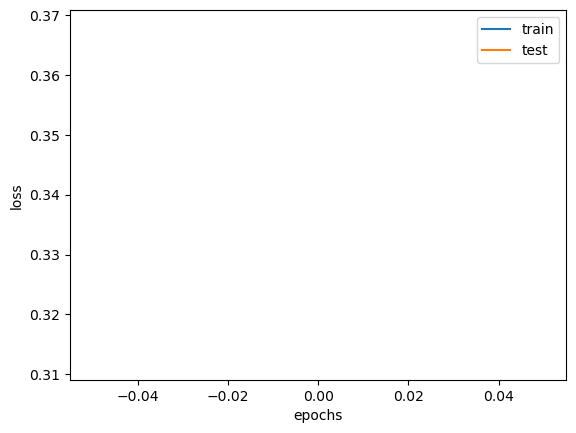

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/pnikrou/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

NameError: name 'export_pred_data' is not defined

In [14]:
################################
##Running the models
################################
#Prepare taining and test data
all_data, Y, Y_test = data_pre_process()


# Call CNN_Model with all required arguments
model = CNN_Model(x_train, Y, x_test, Y_test, steps, features, outputs)

# %%
name = '/Users/pnikrou/Documents/fereshte/Data/run1/Model/WithBN/CNN_Model_2005'

save_model(model, name)


# %%
model = load_model(name)
predict(model, X_test)

# %%

locations = '/Users/pnikrou/Documents/fereshte/Data/run1/validation_locations/validation_locations_18Points.shp'

export_ref_data(locations)

export_pred_data(locations)



